In [5]:
from mylibrary import *
from sklearn.datasets import load_boston
boston_dataset = load_boston()
df_boston_features = pd.DataFrame(data = boston_dataset.data,
                                  columns = boston_dataset.feature_names)
df_boston_target = pd.DataFrame(data = boston_dataset.target, columns=['price'])
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
#75:25 비율로 트레이닝/테스트 데이터 나누기
boston_split = train_test_split(df_boston_features, df_boston_target,
                               test_size=0.25, random_state=17)
df_boston_features_train = boston_split[0]
df_boston_features_test = boston_split[1]
df_boston_target_train = boston_split[2]
df_boston_target_test = boston_split[3]

#선형회귀 모델 생성
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression(fit_intercept=True) #fit_intercept : 절편값을 계산해야함 (0이 아님)
linear_regression_model.fit(df_boston_features_train, df_boston_target_train)

print(linear_regression_model.coef_)
print(linear_regression_model.intercept_)

[[-1.12960344e-01  5.48578928e-02  6.71605489e-02  3.26195457e+00
  -1.70702665e+01  3.49123817e+00  7.03121906e-05 -1.37355630e+00
   3.12880217e-01 -1.32867294e-02 -9.57749225e-01  7.70369247e-03
  -5.59461017e-01]]
[38.51522467]


In [8]:
#선형 모델을 이용해 테스트 데이터셋에 예측 수행
predicted_median_house_prices = linear_regression_model.predict(df_boston_features_test)

Text(0.5, 1.0, 'Expected vs Predicted Prices')

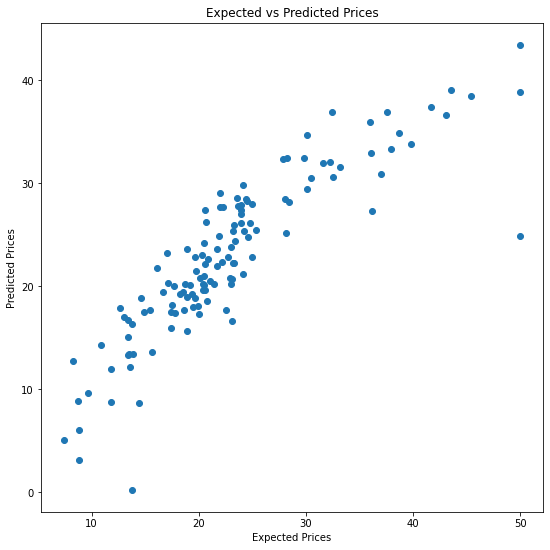

In [9]:
fig, axes = plt.subplots(1, 1, figsize=(9,9))
plt.scatter(df_boston_target_test, predicted_median_house_prices)
plt.xlabel('Expected Prices')
plt.ylabel('Predicted Prices')
plt.title('Expected vs Predicted Prices')

In [11]:
#50개의 점을 산점도로 표현한 다음, 각각의 모델이 생성한 회귀 선분을 생성
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
SyntheticX, SyntheticY = make_regression(n_samples=50, n_features=1, noise=35, random_state=17)

x_scaler = MinMaxScaler()
x_scaler.fit(SyntheticX.reshape(-1, 1))
SyntheticX = x_scaler.transform(SyntheticX.reshape(-1, 1))

y_scaler = MinMaxScaler()
y_scaler.fit(SyntheticY.reshape(-1, 1))
SyntheticY = y_scaler.transform(SyntheticY.reshape(-1, 1))

In [15]:
#합성 데이터셋으로 fit_intercept 매개변수의 효과 확인
linear_regression_model_synthetic1 = LinearRegression(fit_intercept=True)
linear_regression_model_synthetic1.fit(SyntheticX, SyntheticY)
linear_regression_model_synthetic2 = LinearRegression(fit_intercept=False)
linear_regression_model_synthetic2.fit(SyntheticX, SyntheticY)

c1 = linear_regression_model_synthetic1.coef_
i1 = linear_regression_model_synthetic1.intercept_
YPredicted1 = np.dot(SyntheticX, c1) + i1

c2 = linear_regression_model_synthetic2.coef_
i2 = linear_regression_model_synthetic2.intercept_
YPredicted2 = np.dot(SyntheticX, c2) + i2

Text(0, 0.5, 'Y')

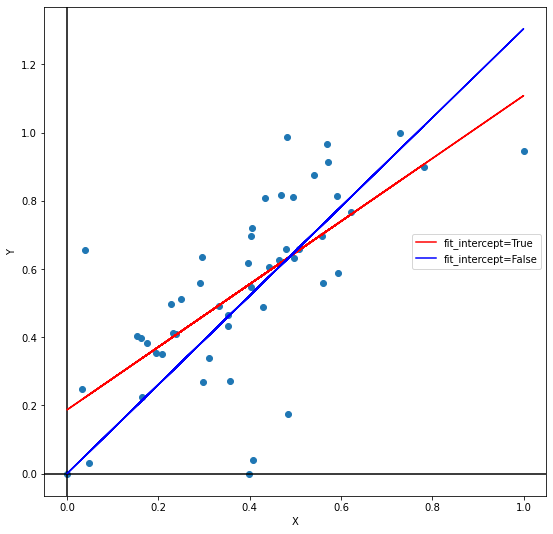

In [16]:
fig, axes = plt.subplots(1, 1, figsize=(9, 9))
axes.axhline(y=0, color='k')
axes.axvline(x=0, color='k')
plt.scatter(SyntheticX, SyntheticY)
plt.plot(SyntheticX, YPredicted1, color='red', label='fit_intercept=True')
plt.plot(SyntheticX, YPredicted2, color='blue', label='fit_intercept=False')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')